# Churn analysis from Brazilian southern states. 

## Introduction

 ><p align= "justify">Given a dataset I did some data cleaning and replacement to run data analysis, able to run data for forecast and retrieve
 insights based on data. It's a churn dataset from Brazilian souther states

In [1]:
# Library importation
import pandas as pd
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
dataset = pd.read_csv('./dados/Churn.csv', delimiter=';')

In [3]:
# First data view, need to change columns name
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
# name columns
dataset.columns =  ['Id', 'Score', 'State', 'Gender', 'Age', 'Assets', 'Balance', 'Products', 'HasCreditCard', 'Active', 'Income', 'Churned']

In [5]:
# check dataset shape for first insight of work needed to be done
dataset.shape

(999, 12)

In [6]:
# dataset with columns renamed
dataset.head()

,Id,Score,State,Gender,Age,Assets,Balance,Products,HasCreditCard,Active,Income,Churned
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [7]:
# it should contain states from brazil's south region only
grouped = dataset.groupby(['State']).size()
grouped

State
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='State'>

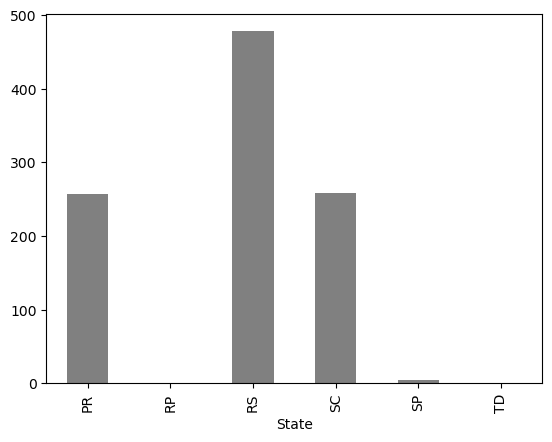

In [8]:
# first costumer count in bars
grouped.plot.bar(color='gray')

In [9]:
# Replace unwanted states with 'RS'
dataset['State'] = dataset['State'].replace({'RP': 'RS', 'SP': 'RS', 'TD': 'RS'})

In [10]:
print("Unique States after replacement:", dataset['State'].unique())

Unique States after replacement: ['RS' 'SC' 'PR']


In [11]:
# data exploration, it should contain states from brazil's south region only
grouped_by_state = dataset.groupby(['State']).size()
grouped_by_state

State
PR    257
RS    484
SC    258
dtype: int64

In [12]:
# Change state from strings to number for data analysis and forecast
label_encoder_state = LabelEncoder()
dataset['State'] = label_encoder_state.fit_transform(dataset['State'])
dataset.head()

,Id,Score,State,Gender,Age,Assets,Balance,Products,HasCreditCard,Active,Income,Churned
0,1,619,1,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,2,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,1,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,1,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,2,Feminino,43,2,12551082,1,1,1,790841.0,0


In [13]:
# Output the mapping of the original labels to their encoded values
state_mapping = {index: label for index, label in enumerate(label_encoder_state.classes_)}
print("State Mapping:", state_mapping)

State Mapping: {0: 'PR', 1: 'RS', 2: 'SC'}


In [14]:
# group dataset based on gender
grouped_by_gender = dataset.groupby(['Gender']).size()
grouped_by_gender

Gender
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [15]:
# Replace 'F' and 'Fem' with 'Feminino'
dataset['Gender'] = dataset['Gender'].replace({'F': 'Feminino', 'Fem': 'Feminino', 'M': 'Masculino'})

In [16]:
# Display current NaN count in Gender
print("NaN count before replacement:", dataset['Gender'].isna().sum())

NaN count before replacement: 8


In [17]:
# Create replacement values: 4 Masculino and 4 Feminino to replace 8 NaN
replacement_values = ['Feminino'] * 4 + ['Masculino'] * 4

In [18]:
# Assign the values to the NaN positions
nan_indices = dataset[dataset['Gender'].isna()].index

In [19]:
# Ensure we have the right number of NaN indices
if len(nan_indices) == len(replacement_values):
    dataset.loc[nan_indices, 'Gender'] = replacement_values
else:
    print("Mismatch in NaN count and replacement values.")

In [20]:
# Display updated Gender column and NaN count
print("Updated Gender column:")
print(dataset['Gender'])
print("NaN count after replacement:", dataset['Gender'].isna().sum())
print("Null count after replacement:", dataset['Gender'].isnull().sum())

Updated Gender column:
0       Feminino
1       Feminino
2       Feminino
3       Feminino
4       Feminino
         ...    
994    Masculino
995    Masculino
996    Masculino
997    Masculino
998     Feminino
Name: Gender, Length: 999, dtype: object
NaN count after replacement: 0
Null count after replacement: 0


In [21]:
# it should contain tptal sum for genders Feminino or Masculino
grouped = dataset.groupby(['Gender']).size()
grouped

Gender
Feminino     468
Masculino    531
dtype: int64

In [22]:
# Check for non-string values
non_string_count = dataset[~dataset['Gender'].apply(lambda x: isinstance(x, (str, int)))].shape[0]
print(f"Non-string values in Gender column: {non_string_count}")

Non-string values in Gender column: 0


In [23]:
# change gender from string to 0 and 1
label_encoder_gender = LabelEncoder()
dataset['Gender'] = label_encoder_gender.fit_transform(dataset['Gender'])
dataset.head(50)

,Id,Score,State,Gender,Age,Assets,Balance,Products,HasCreditCard,Active,Income,Churned
0,1,619,1,0,42,2,0,1,1,1,1.013489e+07,1
1,2,608,2,0,41,1,8380786,1,0,1,1.125426e+07,0
2,3,502,1,0,42,8,1596608,3,1,0,1.139316e+07,1
3,4,699,1,0,39,1,0,2,0,0,9.382663e+06,0
4,5,850,2,0,43,2,12551082,1,1,1,7.908410e+05,0
5,6,645,2,1,44,8,11375578,2,1,0,1.497567e+07,1
6,7,822,1,1,50,7,0,2,1,1,1.006280e+05,0
7,8,376,0,0,29,4,11504674,4,1,0,1.193469e+10,1
8,9,501,1,1,44,4,14205107,2,0,1,7.494050e+05,0
9,10,684,1,1,27,2,13460388,1,1,1,7.172573e+06,0


In [24]:
# Displaying the classes for the 'Gender' encoder
label_encoder_gender.classes_

array(['Feminino', 'Masculino'], dtype=object)

In [25]:
# Verify the structure of the grouped DataFrame
print("Grouped DataFrame:")
print(grouped)

Grouped DataFrame:
Gender
Feminino     468
Masculino    531
dtype: int64


In [26]:
# Grouping the dataset by State and Churned, counting occurrences, and splitting by Gender
grouped = dataset.groupby(['State', 'Churned', 'Gender']).size().unstack(fill_value=0)

In [27]:
# Mapping state numbers to their names
state_mapping = {0: 'PR', 1: 'RS', 2: 'SC'}
grouped.index = grouped.index.set_levels([grouped.index.levels[0].map(state_mapping), grouped.index.levels[1]])

In [28]:
# Verify the structure of the grouped DataFrame
print("Grouped DataFrame:")
print(grouped)

Grouped DataFrame:
Gender           0    1
State Churned          
PR    0         87   95
      1         39   36
RS    0        168  239
      1         51   26
SC    0         93  114
      1         30   21


In [29]:
# Creating a new index with state names mapped from numbers
grouped.index = pd.MultiIndex.from_tuples(
    [(state_mapping.get(state, state), churned) for state, churned in grouped.index],
    names=['State', 'Churned']
)


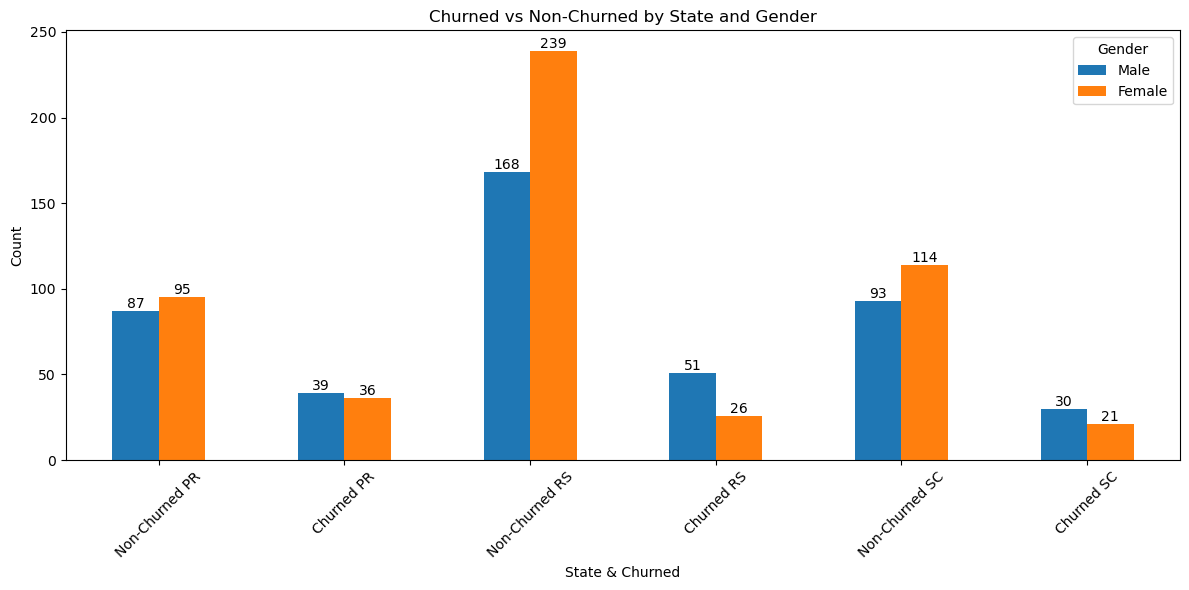

In [30]:
# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
grouped.plot(kind='bar', stacked=False, ax=ax)
plt.title('Churned vs Non-Churned by State and Gender')
plt.ylabel('Count')
plt.xlabel('State & Churned')

# Creating x-tick labels to show state name and churn status
xtick_labels = [f"{'Churned' if churned == 1 else 'Non-Churned'} {state}" for state, churned in grouped.index]
plt.xticks(ticks=range(len(xtick_labels)), labels=xtick_labels, rotation=45)
plt.legend(title='Gender', labels=['Male', 'Female'])

# Adding values centered on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only label non-zero bars
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [31]:
# Mapping state numbers to their names
state_mapping = {0: 'PR', 1: 'RS', 2: 'SC'}
dataset['State'] = dataset['State'].map(state_mapping)


In [32]:
# Grouping the data by State and Churned
grouped_state_churned = dataset.groupby(['State', 'Churned']).size().unstack(fill_value=0)

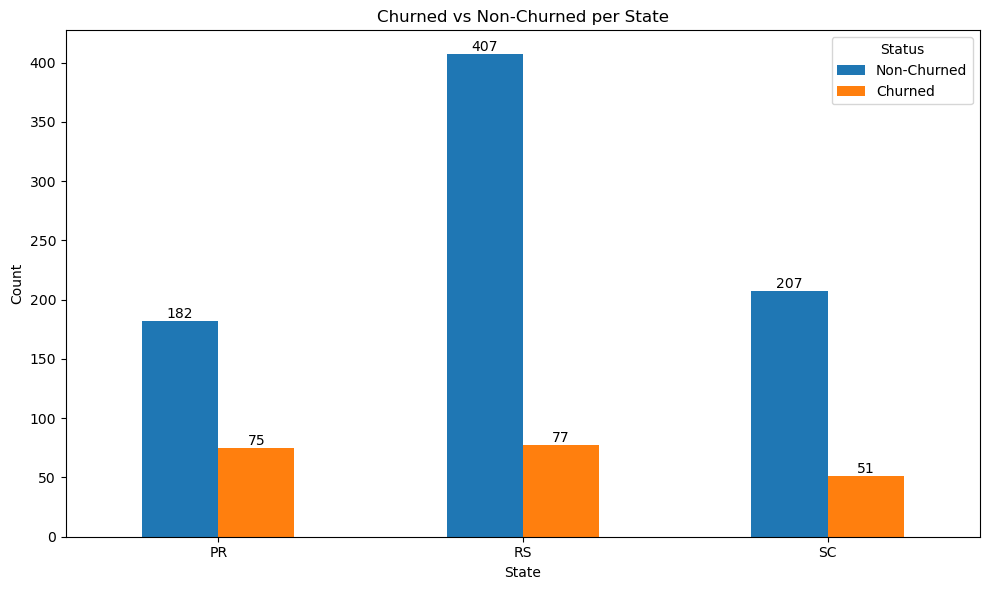

In [33]:
# Plotting the grouped bar chart for churned vs non-churned per state
fig, ax = plt.subplots(figsize=(10, 6))
grouped_state_churned.plot(kind='bar', stacked=False, ax=ax)
plt.title('Churned vs Non-Churned per State')
plt.ylabel('Count')
plt.xlabel('State')
plt.xticks(rotation=0)
plt.legend(['Non-Churned', 'Churned'], title='Status')

# Adding values centered on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only label non-zero bars
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

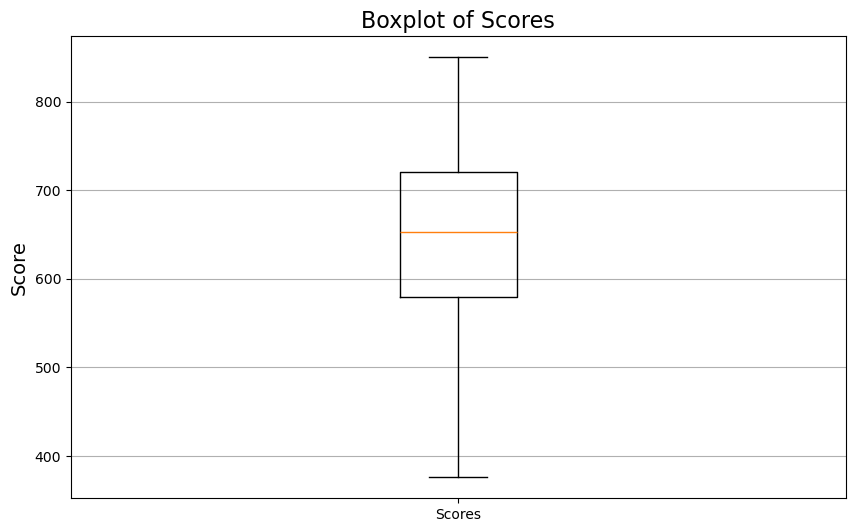

In [34]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot
plt.boxplot(dataset['Score'], vert=True)

# Set titles and labels
plt.title('Boxplot of Scores', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xticks([1], ['Scores'])  # Label for the x-axis

# Show the plot
plt.grid(axis='y')
plt.show()

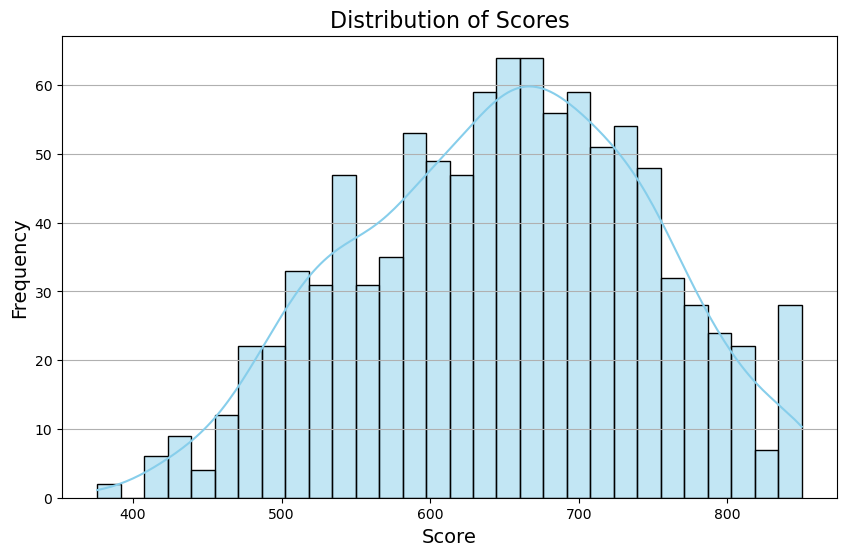

In [35]:
# Score distribution in barplot
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Score'], kde=True, color='skyblue', bins=30)  # Include KDE
plt.title('Distribution of Scores', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y')
plt.show()

In [36]:
# dataset age description analysis
dataset['Age'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Age, dtype: float64

In [37]:
# Changing all ages in the range from 0 to 18 to 38 which is the mean
dataset.loc[(dataset['Age'] >= -100) & (dataset['Age'] <= 18), 'Age'] = 38

In [38]:
# dataset age decription analysis
dataset['Age'].describe()

count    999.000000
mean      39.219219
std       10.771120
min       19.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Age, dtype: float64

In [39]:
# handle outliers that are way above 85
dataset.loc[(dataset['Age'] <= 200) & (dataset['Age'] >= 80), 'Age'] = 85

In [40]:
# Verifying the change
dataset['Age'].describe()

count    999.000000
mean      39.172172
std       10.422939
min       19.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       85.000000
Name: Age, dtype: float64

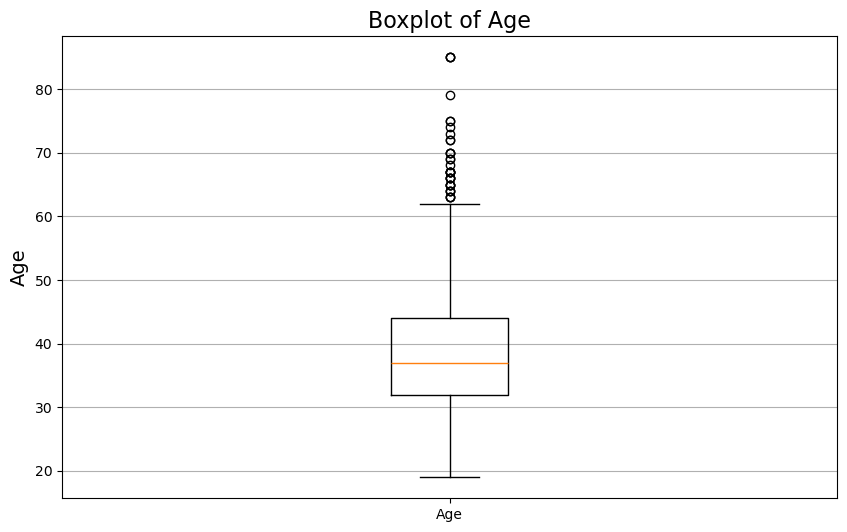

In [41]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot
plt.boxplot(dataset['Age'], vert=True)

# Set titles and labels
plt.title('Boxplot of Age', fontsize=16)
plt.ylabel('Age', fontsize=14)
plt.xticks([1], ['Age'])  # Label for the x-axis

# Show the plot
plt.grid(axis='y')
plt.show()

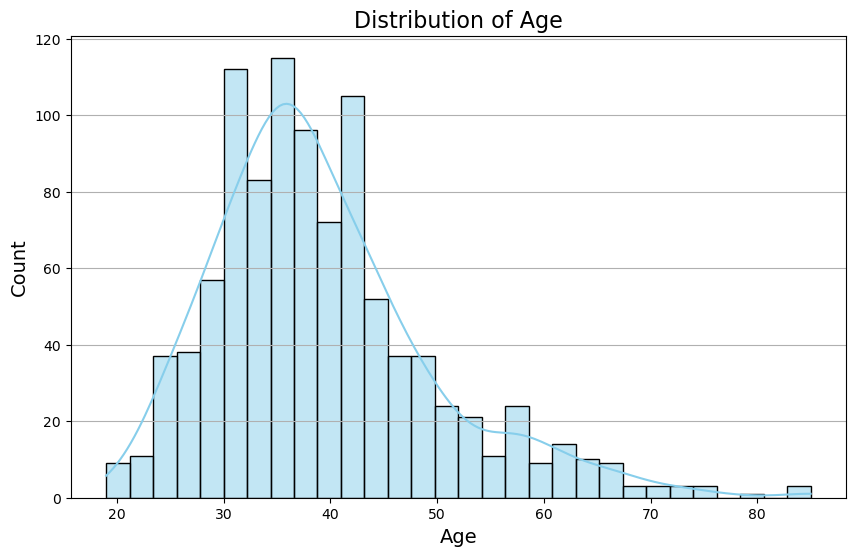

In [42]:
# age distribution in barplot
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Age'], kde=True, color='skyblue', bins=30)  # Include KDE
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y')
plt.show()

In [43]:
# Verifying the score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

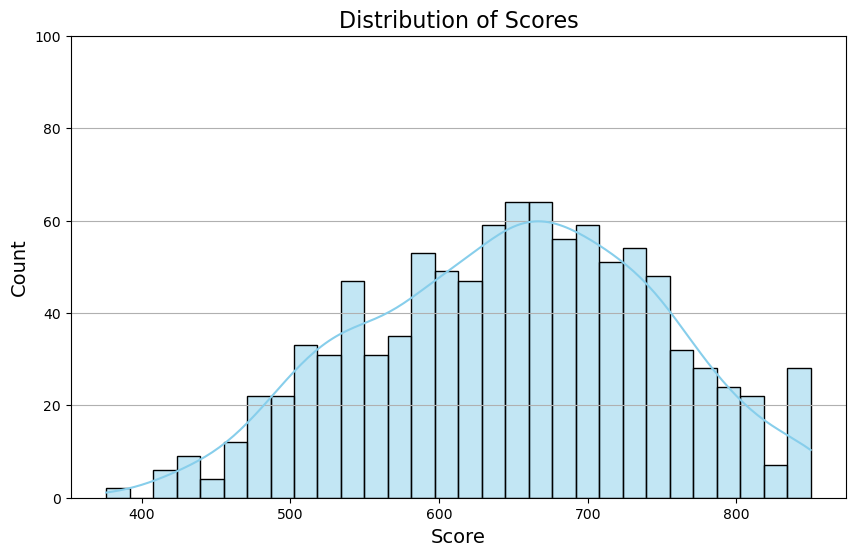

In [44]:
# score barplot distribution, it follows to some degree a normal distribution
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Score'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Scores', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.ylim(0, 100)  # Adjust this value based on your data's needs
plt.grid(axis='y')
plt.show()


In [45]:
# balance data description
dataset['Balance'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Balance, dtype: float64

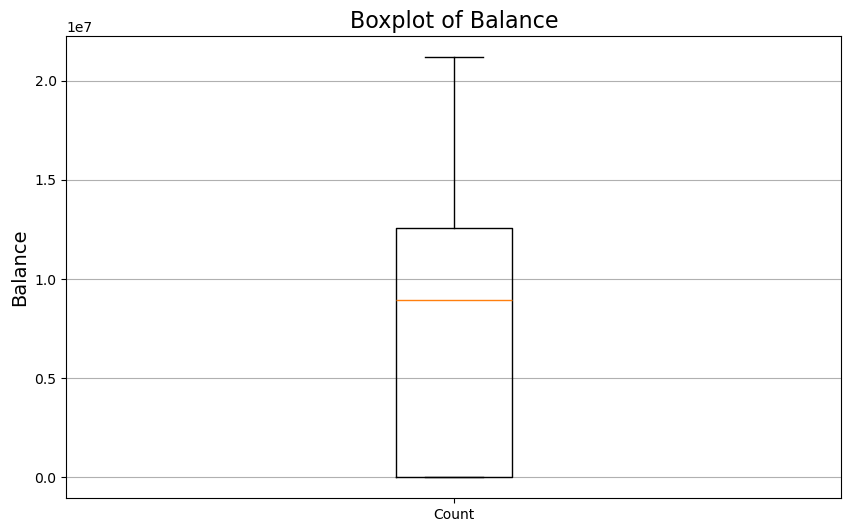

In [46]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot for balance
plt.boxplot(dataset['Balance'], vert=True)

# Set titles and labels
plt.title('Boxplot of Balance', fontsize=16)
plt.ylabel('Balance', fontsize=14)
plt.xticks([1], ['Count'])  # Label for the x-axis

# Show the plot
plt.grid(axis='y')
plt.show()

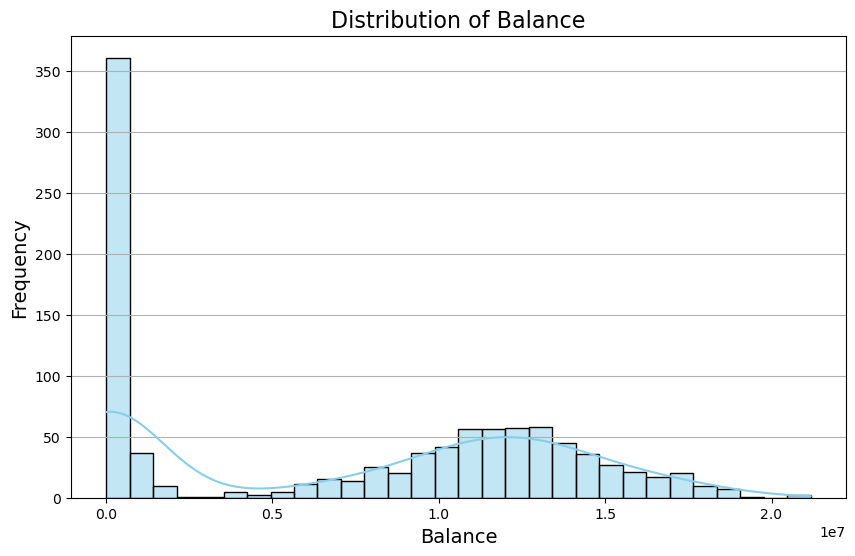

In [47]:
# barplot Balance data distribution on barplot
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Balance'], kde=True, color='skyblue', bins=30)  # Include KDE
plt.title('Distribution of Balance', fontsize=16)
plt.xlabel('Balance', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y')
plt.show()

In [48]:
# Identifying the number of rows with 'Balance' between 0.0 and 0.2e10
mask = (dataset['Balance'] >= 0.0) & (dataset['Balance'] <= 0.5e7)
count_to_replace = mask.sum()
count_to_replace

418

In [49]:
# Generating equally spaced values between 0.5e7 and 2.0e7
new_values = np.linspace(0.5e7, 2.0e7, count_to_replace)

In [50]:
# Replacing the 0 values in 'Balance' with the new distributed values
dataset.loc[mask, 'Balance'] = new_values

/tmp/ipykernel_5056/1776308575.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 5000000.          5035971.22302158  5071942.44604317  5107913.66906475
  5143884.89208633  5179856.11510791  5215827.3381295   5251798.56115108
  5287769.78417266  5323741.00719424  5359712.23021583  5395683.45323741
  5431654.67625899  5467625.89928058  5503597.12230216  5539568.34532374
  5575539.56834532  5611510.79136691  5647482.01438849  5683453.23741007
  5719424.46043165  5755395.68345324  5791366.90647482  5827338.1294964
  5863309.35251799  5899280.57553957  5935251.79856115  5971223.02158273
  6007194.24460432  6043165.4676259   6079136.69064748  6115107.91366906
  6151079.13669065  6187050.35971223  6223021.58273381  6258992.8057554
  6294964.02877698  6330935.25179856  6366906.47482014  6402877.69784173
  6438848.92086331  6474820.14388489  6510791.36690648  6546762.58992806
  6582733.81294964  6618705.03597

In [51]:
# Verifying the changes
dataset['Balance'].describe()

count    9.990000e+02
mean     1.229442e+07
std      3.607629e+06
min      5.000000e+06
25%      9.740928e+06
50%      1.223112e+07
75%      1.481590e+07
max      2.117743e+07
Name: Balance, dtype: float64

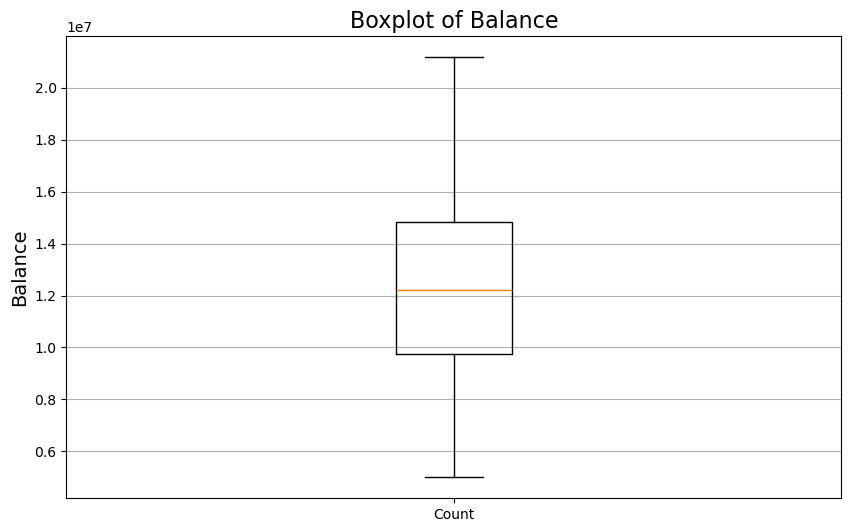

In [52]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot
plt.boxplot(dataset['Balance'], vert=True)

# Set titles and labels
plt.title('Boxplot of Balance', fontsize=16)
plt.ylabel('Balance', fontsize=14)
plt.xticks([1], ['Count'])  # Label for the x-axis

# Show the plot
plt.grid(axis='y')
plt.show()

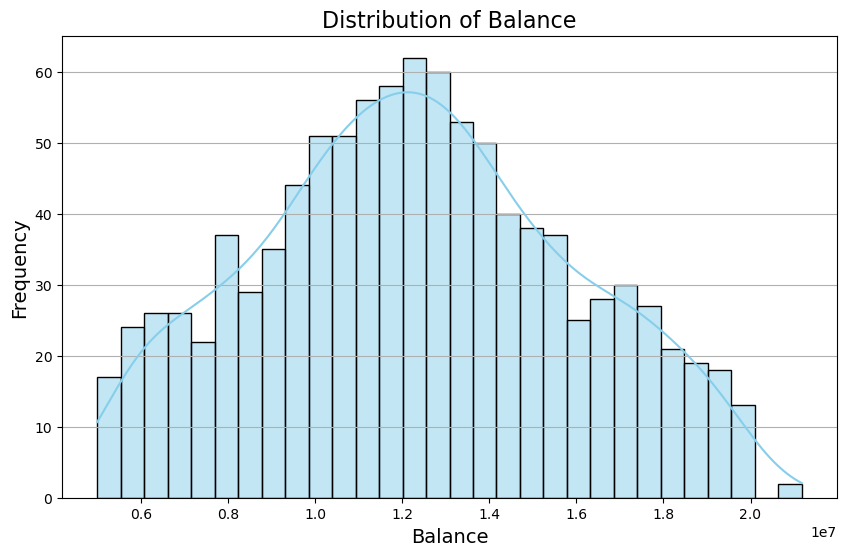

In [53]:
# barplot distribution after replacing an uneven valu of balance. most customers must not have filled with their correct data,
# hence redistributed values that span from 0 to 0.5e7 and equaly distribute them for normal distribution 
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Balance'], kde=True, color='skyblue', bins=30)  # Include KDE
plt.title('Distribution of Balance', fontsize=16)
plt.xlabel('Balance', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y')
plt.show()

In [54]:
# describe Income data
dataset['Income'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Income, dtype: float64

In [55]:
# Check for NaN and Null values
dataset['Income'].isna().sum()

# Replacing NaN values in the 'Income' column with 0
dataset['Income'] = dataset['Income'].fillna(0)

# Verifying the change
print('Na sum:', dataset['Income'].isna().sum())
print('Null sum:', dataset['Income'].isnull().sum())

Na sum: 0
Null sum: 0


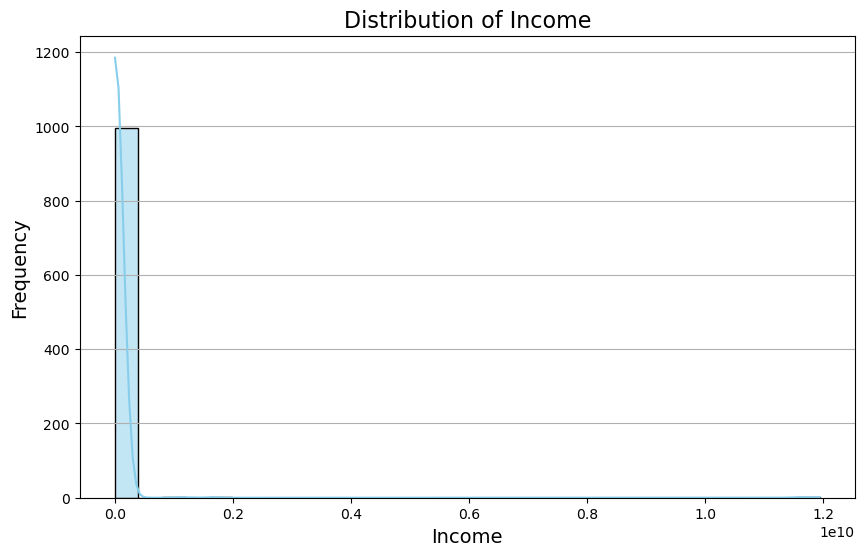

In [56]:
# Obviously customers have not filled their Income data, will redistribute all 999 customers to normal distribution
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Income'], kde=True, color='skyblue', bins=30)  # Include KDE
plt.title('Distribution of Income', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y')
plt.show()

In [57]:
# Identifying the number of rows with 'Income' between 0.0 and 0.2e10
mask = (dataset['Income'] > 0.0) & (dataset['Income'] <= 0.2e10)
count_to_replace = mask.sum()
count_to_replace

990

In [58]:
# Generating values from a normal distribution between 0.1e6 and 1.2e10
mean = 0.6e10  # Setting a mean value within the desired range
std_dev = 0.3e10  # Adjusting standard deviation for appropriate spread

In [59]:
# Generating normally distributed values and clipping them between 0.1e6 and 1.2e10
new_values = np.random.normal(loc=mean, scale=std_dev, size=count_to_replace)
new_values = np.clip(new_values, 0.1e6, 1.2e10)  # Ensuring values stay within the specified range

In [60]:
# Replacing the 'Balance' values in the specified range with the new values
dataset.loc[mask, 'Income'] = new_values

In [61]:
# Verifying the changes
dataset['Income'].describe()

count    9.990000e+02
mean     6.034826e+09
std      2.929407e+09
min      0.000000e+00
25%      4.002818e+09
50%      6.078228e+09
75%      8.098849e+09
max      1.200000e+10
Name: Income, dtype: float64

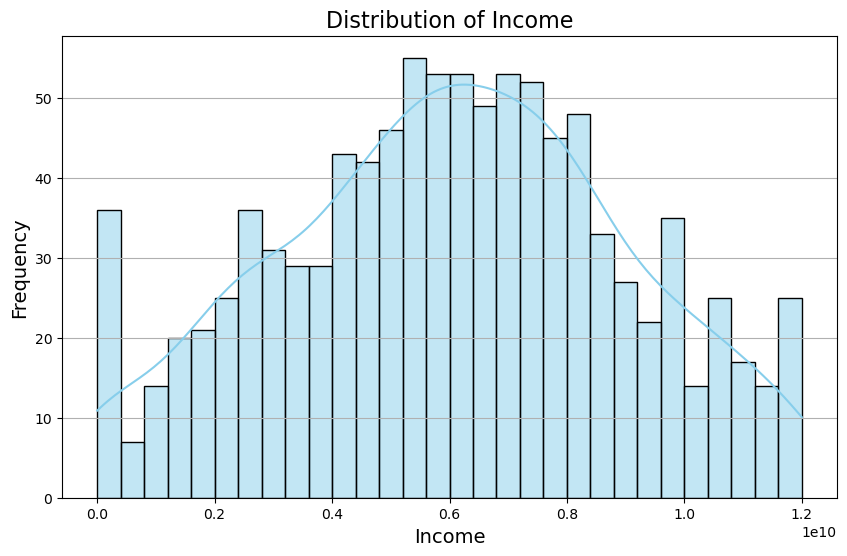

In [62]:
# Income now should have somewhat normal distribution
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Income'], kde=True, color='skyblue', bins=30)  # Include KDE
plt.title('Distribution of Income', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y')
plt.show()

In [63]:
# Turn state back to their classes 0, 1 and 2
dataset['State'] = label_encoder_state.fit_transform(dataset['State'])
dataset.head()

,Id,Score,State,Gender,Age,Assets,Balance,Products,HasCreditCard,Active,Income,Churned
0,1,619,1,0,42,2,5.000000e+06,1,1,1,5.677945e+09,1
1,2,608,2,0,41,1,8.380786e+06,1,0,1,4.994492e+09,0
2,3,502,1,0,42,8,5.035971e+06,3,1,0,6.846056e+09,1
3,4,699,1,0,39,1,5.071942e+06,2,0,0,8.348547e+09,0
4,5,850,2,0,43,2,1.255108e+07,1,1,1,1.122588e+10,0


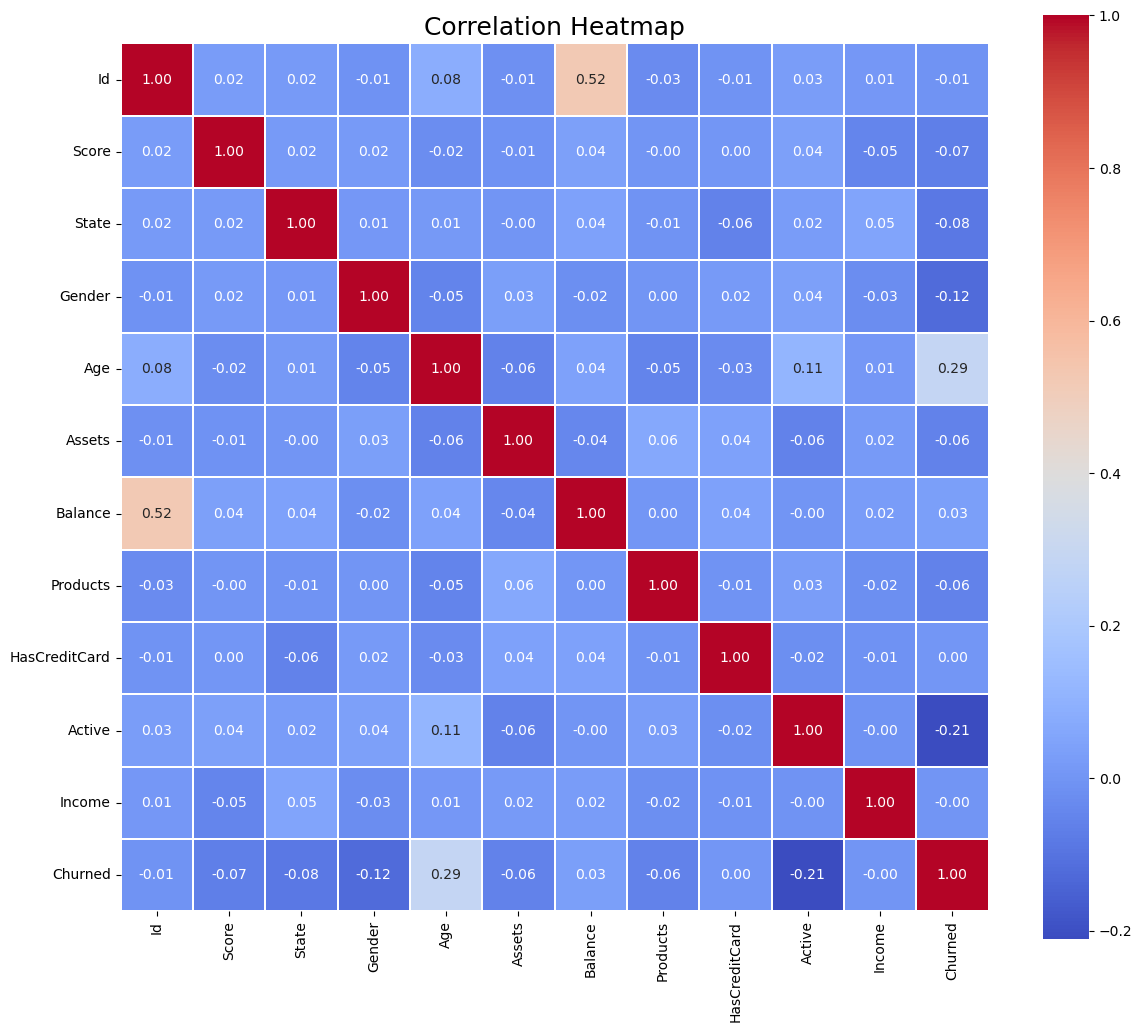

In [64]:
# Displaying a larger heatmap for better visualization of data correlation
plt.figure(figsize=(14, 12))
sns.heatmap(dataset.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True)
plt.title('Correlation Heatmap', fontsize=18)
plt.show()

## Correlation analysis

 ><p align= "justify">We know that Active customers have a negative correlation to churn. This means that when Activeness goes up, churn goes down.
 ><p align= "justify">We know that Age is positvely correlated to churn, meaning that the older the customer is, higher are the chances of he or she churn.
  ><p align= "justify">We know that Gender is positvely correlated to churn, meaning that when moving from females (0) to male(1), churn decreases slightely as we can see at plot below

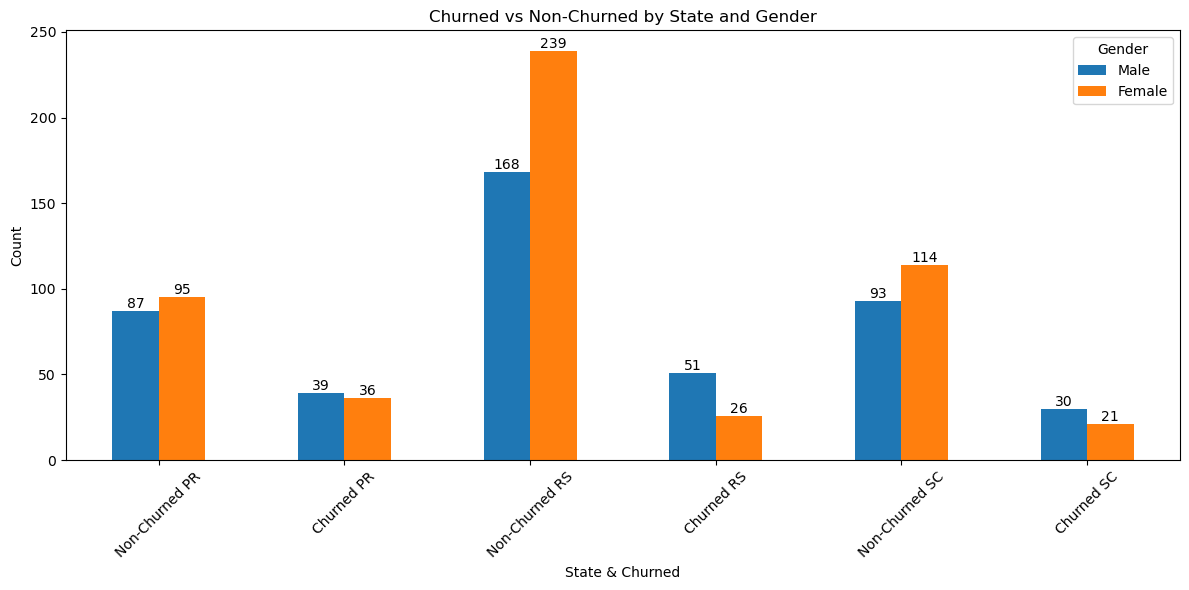

In [65]:
# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
grouped.plot(kind='bar', stacked=False, ax=ax)
plt.title('Churned vs Non-Churned by State and Gender')
plt.ylabel('Count')
plt.xlabel('State & Churned')

# Creating x-tick labels to show state name and churn status
xtick_labels = [f"{'Churned' if churned == 1 else 'Non-Churned'} {state}" for state, churned in grouped.index]
plt.xticks(ticks=range(len(xtick_labels)), labels=xtick_labels, rotation=45)
plt.legend(title='Gender', labels=['Male', 'Female'])

# Adding values centered on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only label non-zero bars
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [67]:
dataset.head()

,Id,Score,State,Gender,Age,Assets,Balance,Products,HasCreditCard,Active,Income,Churned
0,1,619,1,0,42,2,5.000000e+06,1,1,1,5.677945e+09,1
1,2,608,2,0,41,1,8.380786e+06,1,0,1,4.994492e+09,0
2,3,502,1,0,42,8,5.035971e+06,3,1,0,6.846056e+09,1
3,4,699,1,0,39,1,5.071942e+06,2,0,0,8.348547e+09,0
4,5,850,2,0,43,2,1.255108e+07,1,1,1,1.122588e+10,0


In [68]:
# Saving the dataset to a CSV file
dataset.to_csv('./dados/cleaned_dataset.csv', index=False)

# Confirmation message
print("Dataset has been saved as 'cleaned_dataset.csv'.")


Dataset has been saved as 'cleaned_dataset.csv'.
